<a href="https://colab.research.google.com/github/jordetm5/colab/blob/master/masatransversasample5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [15]:
particles = pd.read_csv('https://goo.gl/GJGJ9m')
particles.head()

,Run,Event,pt,eta,phi,Q,chiSq,dxy,iso,MET,phiMET
0,173389,489963747,29.3153,-0.1393,1.3561,1,0.8456,-0.0600,0.0000,30.6670,-2.1308
1,173389,490024840,44.1461,-1.3590,-0.5390,1,1.2943,-0.0126,26.3423,27.9521,-2.6686
2,173389,490102189,42.7895,-1.0193,2.3390,-1,0.8078,-0.0840,2.9748,5.1565,0.3061
3,173389,490092121,31.2215,-0.1270,-0.4889,-1,109.9490,0.0723,56.4897,4.2143,-0.1166
4,173389,490193981,36.9668,1.8557,1.3772,1,1.0597,-0.0676,41.4910,20.9963,-1.6251


In [16]:
len(particles)

100000

Calcularemos la masa transversa con la siguiente formula 

$$m_t=\sqrt{2P_{t1}P_{t2}(1-cos(\Delta\phi))}$$

con $\Delta\phi $ el angulo entre las particulas; pero en este caso solamente tenemos un momento y MET asi que seguramente tenemos una particula que decae a un lepton y neutrinos. Asi pues cmo la masa del neutrin es cercana a cero  $P_{t2}=MET$

In [0]:
pt=np.array(particles.pt)
MET=np.array(particles.MET)
phiMET=np.array(particles.phiMET)
phi=np.array(particles.phi)
deltaphi=np.abs(phi-phiMET)
chiSq=np.array(particles.chiSq)
iso=np.array(particles.iso)
dxy=np.array(particles.dxy)

for i in range (0,len(deltaphi)):
  if deltaphi[i]<math.pi:
    deltaphi[i]=2*math.pi-deltaphi[i]

mass=np.sqrt(2*pt*MET*(1-np.cos(deltaphi)))


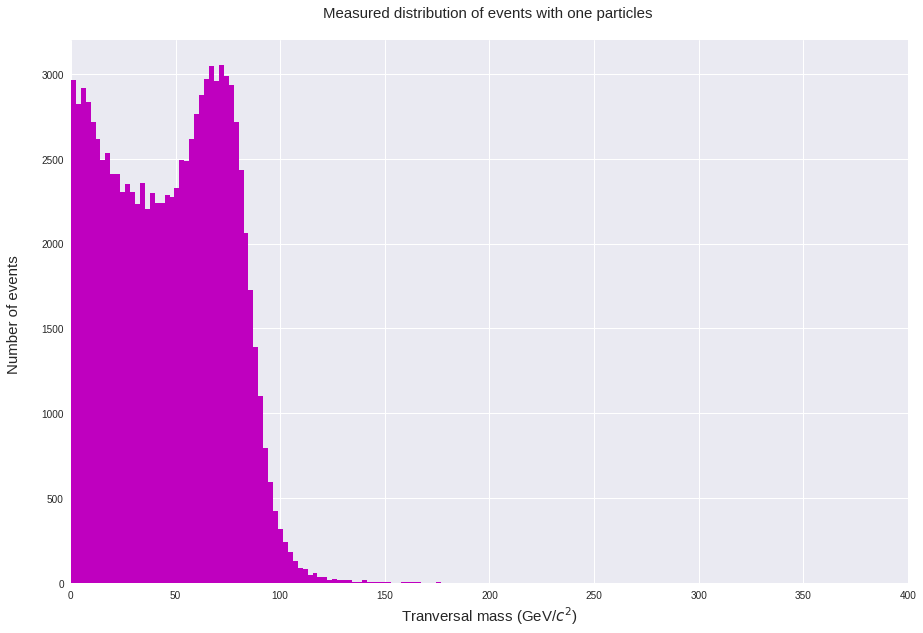

In [18]:
fig = plt.figure(figsize=(15, 10))

plt.hist(mass, bins=600,color='m')

plt.xlabel('Tranversal mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with one particles \n', fontsize = 15)
plt.xlim(0,400) #limito el eje x para que se vea bien
plt.show()

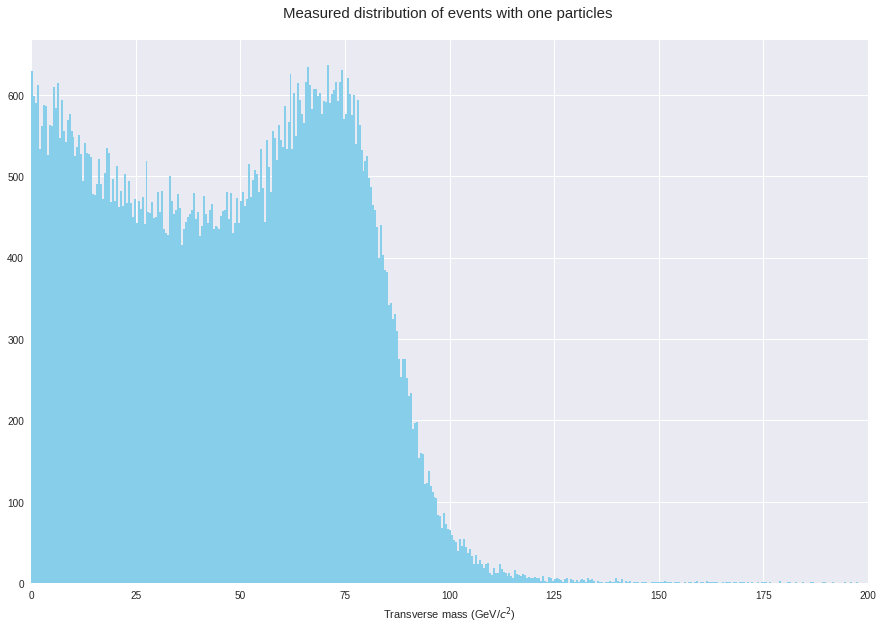

In [19]:
#graficamos
fig = plt.figure(figsize=(15, 10))
plt.hist(mass, bins=3000,color='skyblue')
plt.xlabel('Transverse mass (GeV/$c^2$)')
plt.title('Measured distribution of events with one particles \n', fontsize = 15)
plt.xlim(0,200)
plt.show()


La piedra angular de casi todos los ajustes es el método Chi cuadrado, que se basa en las estadísticas de la función Chi cuadrado tal como se define:
$$X^{2}=\sum_{i}^{N_{d}}\left[\frac{N_{i}(t_{i})-f_{i}(ti;a_{M})}{\sigma_i}\right]^2$$

donde el $N_i (t_i)$ son las mediciones individuales (por ejemplo, el número de conteos en uno de los intervalos de tiempo), y el
el valor predicho del modelo es $ f_i (t_i; a_M) $ donde los $a_M$ son los parámetros M que se establecen en un valor de prueba razonable. El error estándar de cada medida es el sigma_i en el denominador. Hay un total de mediciones $N_d$.

Esta función es una medida intuitivamente razonable de qué tan bien los datos se adaptan a un modelo: solo se suman los cuadrados de las diferencias entre la predicción del modelo y los datos reales medidos, divididos por la varianza de los datos según lo determinado por los errores de medición estándar. Si todas las mediciones están dentro de 1 desviación estándar de la predicción del modelo, Chi-cuadrado toma un valor aproximadamente igual al número de mediciones. En general, si Chi-cuadrado / Nd es de orden 1.0, entonces el ajuste es razonablemente bueno. Cubriendo, si Chi-cuadrado / Nd >> 1.0, entonces el ajuste es pobre.



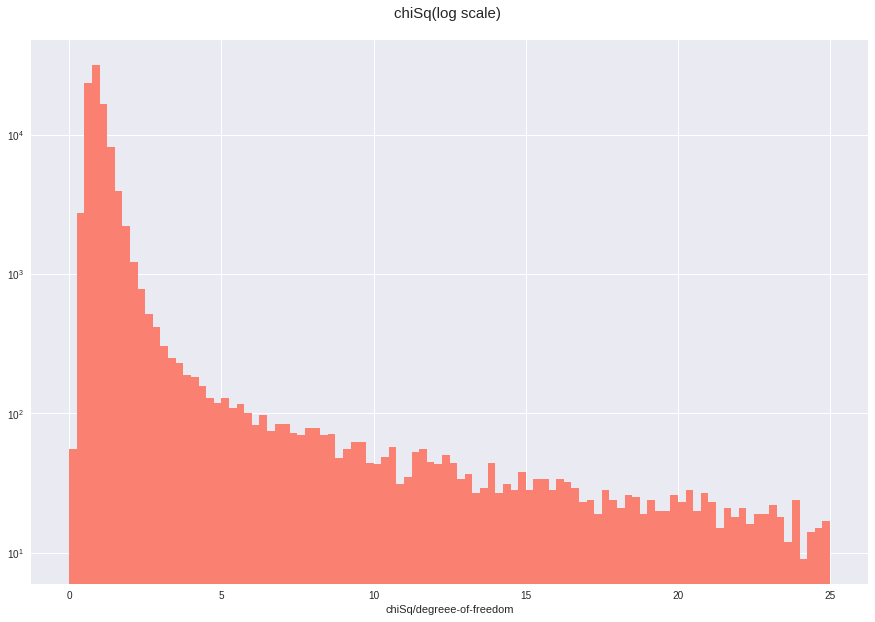

In [27]:
fig3 = plt.figure(figsize=(15, 10))
plt.hist(chiSq, bins=100, range=(0,25),color='salmon')

plt.title('chiSq(log scale) \n', fontsize = 15)
plt.xlabel('chiSq/degreee-of-freedom')
plt.yscale('log')
plt.show()

Definimos la variable de aislamiento de la siguiente manera:
$$Iso=Iso_{Track}+Iso_{ECAL}+Iso_{HCAL}$$

Donde IsoT racker, IsoECAL e IsoHCAL son respectivamente la suma del pT medido en el tracker, de la energía
transversa ET medida en el calorímetro electromagnético y de la energía transversa medida en el calorímetro hadrónico.

Los muones que más nos interesan en este trabajo se esperan que provengan de un bosón y por lo tanto se espera
que estén suficientemente aislados.
, por lo que la separación entre muones de fondo y muones
de señal mejora normalizando la variable de aislamiento Iso por el pT dando lugar a la variable de aislamiento
relativa:

$$RelIso=\frac{Iso}{P_{t}}$$




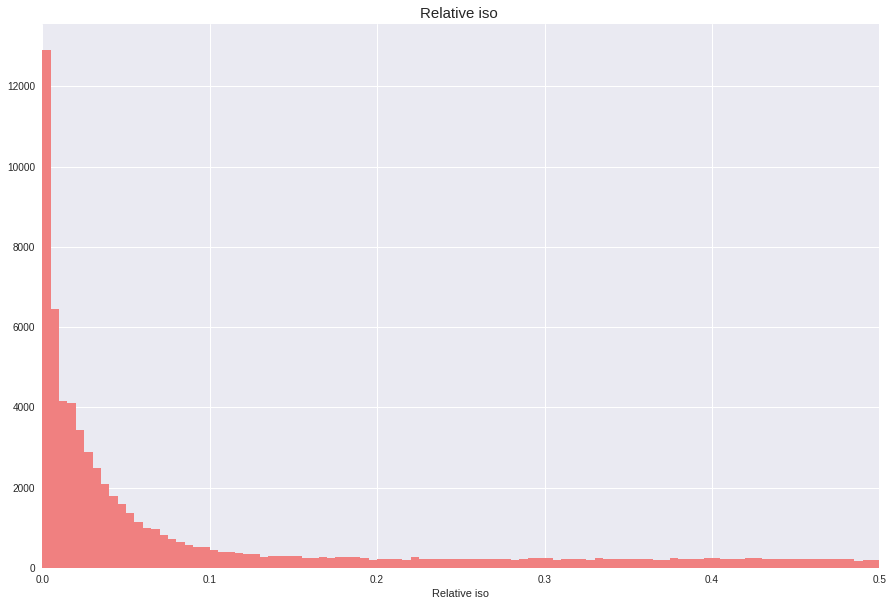

In [28]:
fig_iso = plt.figure(figsize=(15, 10))
plt.hist(iso/pt, bins=100,range=(0,0.5),color='lightcoral')
plt.xlabel('Relative iso')
plt.title('Relative iso ', fontsize = 15)
plt.xlim(0,0.5)
plt.show()

dxy, Esta variable ayuda a identificar si
el muón proviene o no del vértice primario. El parámetro de impacto se calcula en las
tres dimensiones espaciales gracias a la resolución del detector de píxeles del tracker.


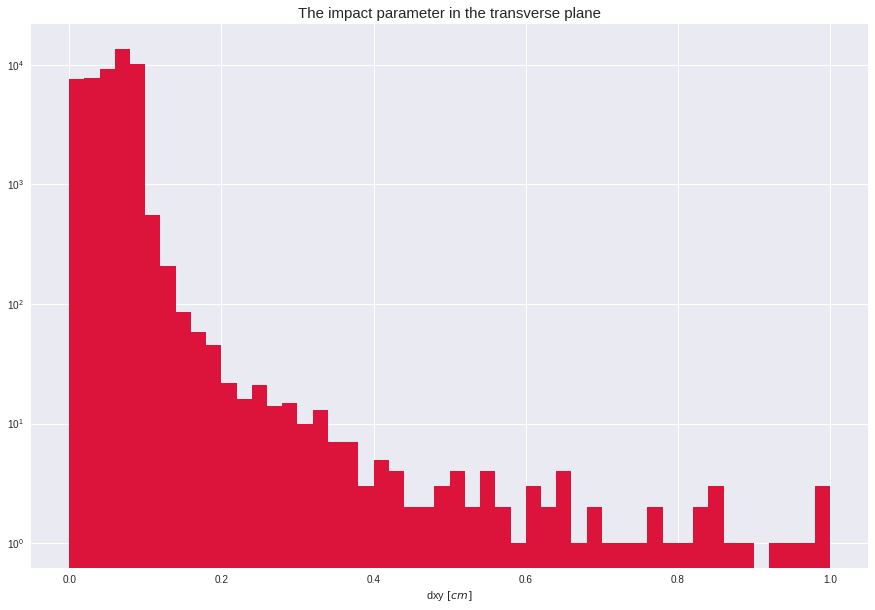

In [22]:
fig_dxy = plt.figure(figsize=(15, 10))
plt.hist(dxy, bins=50,range=(0,1),color='crimson')
plt.xlabel('dxy $[cm]$')
plt.title('The impact parameter in the transverse plane', fontsize = 15)

plt.yscale('log')
plt.show()

En primer lugar, esperamos encontrar dos leptones en nuestro evento que además provienen de bosones W,
con lo que prácticamente se producen en el vértice principal y serán bastante energéticos.
Adicionalmente deberían encontrarse aislados en el detector. Por tanto exigimos exactamente dos leptones buenos
en el evento y de signo opuesto.
En el caso de los muones, exigiremos las siguientes condiciones.
La condición de aislamiento se traduce en exigir $I-rel$ < 0,1
Por último, el hecho de que se generen prácticamente en el vértice de interacción se puede exigir en
término de sus parámetros de impacto tomando |dxy| < 0,2cm y chiSq < 10 



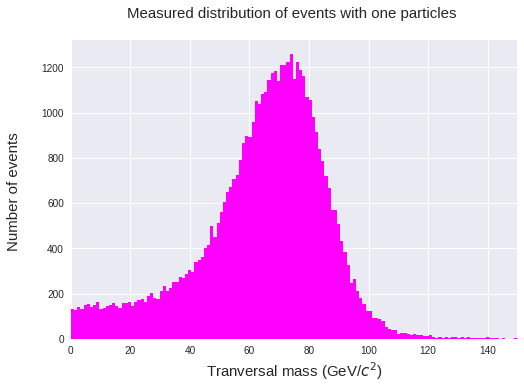

In [23]:
s=[]
for i in range(0,len(mass)):
  if chiSq[i]<10 and dxy[i]<0.2 and iso[i]/pt[i]<0.1:
    s.append(mass[i])
  
plt.hist(s, bins=600,color='fuchsia')

plt.xlabel('Tranversal mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with one particles \n', fontsize = 15)
plt.xlim(0,150) #limito el eje x para que se vea bien
plt.show()

In [24]:
len(s)

49466

Como la punta mas alta esta cerca de 80GeV puedo concluir que se trata de  boson W que decayeron a un lepton y neutrinos, despues de haber resteigido los eventos a las  condiciones presentadas antes se oberva mas claramente el cumulo del boson W, auqe redujo el numero de eventos de 100,000 a 49,466.
